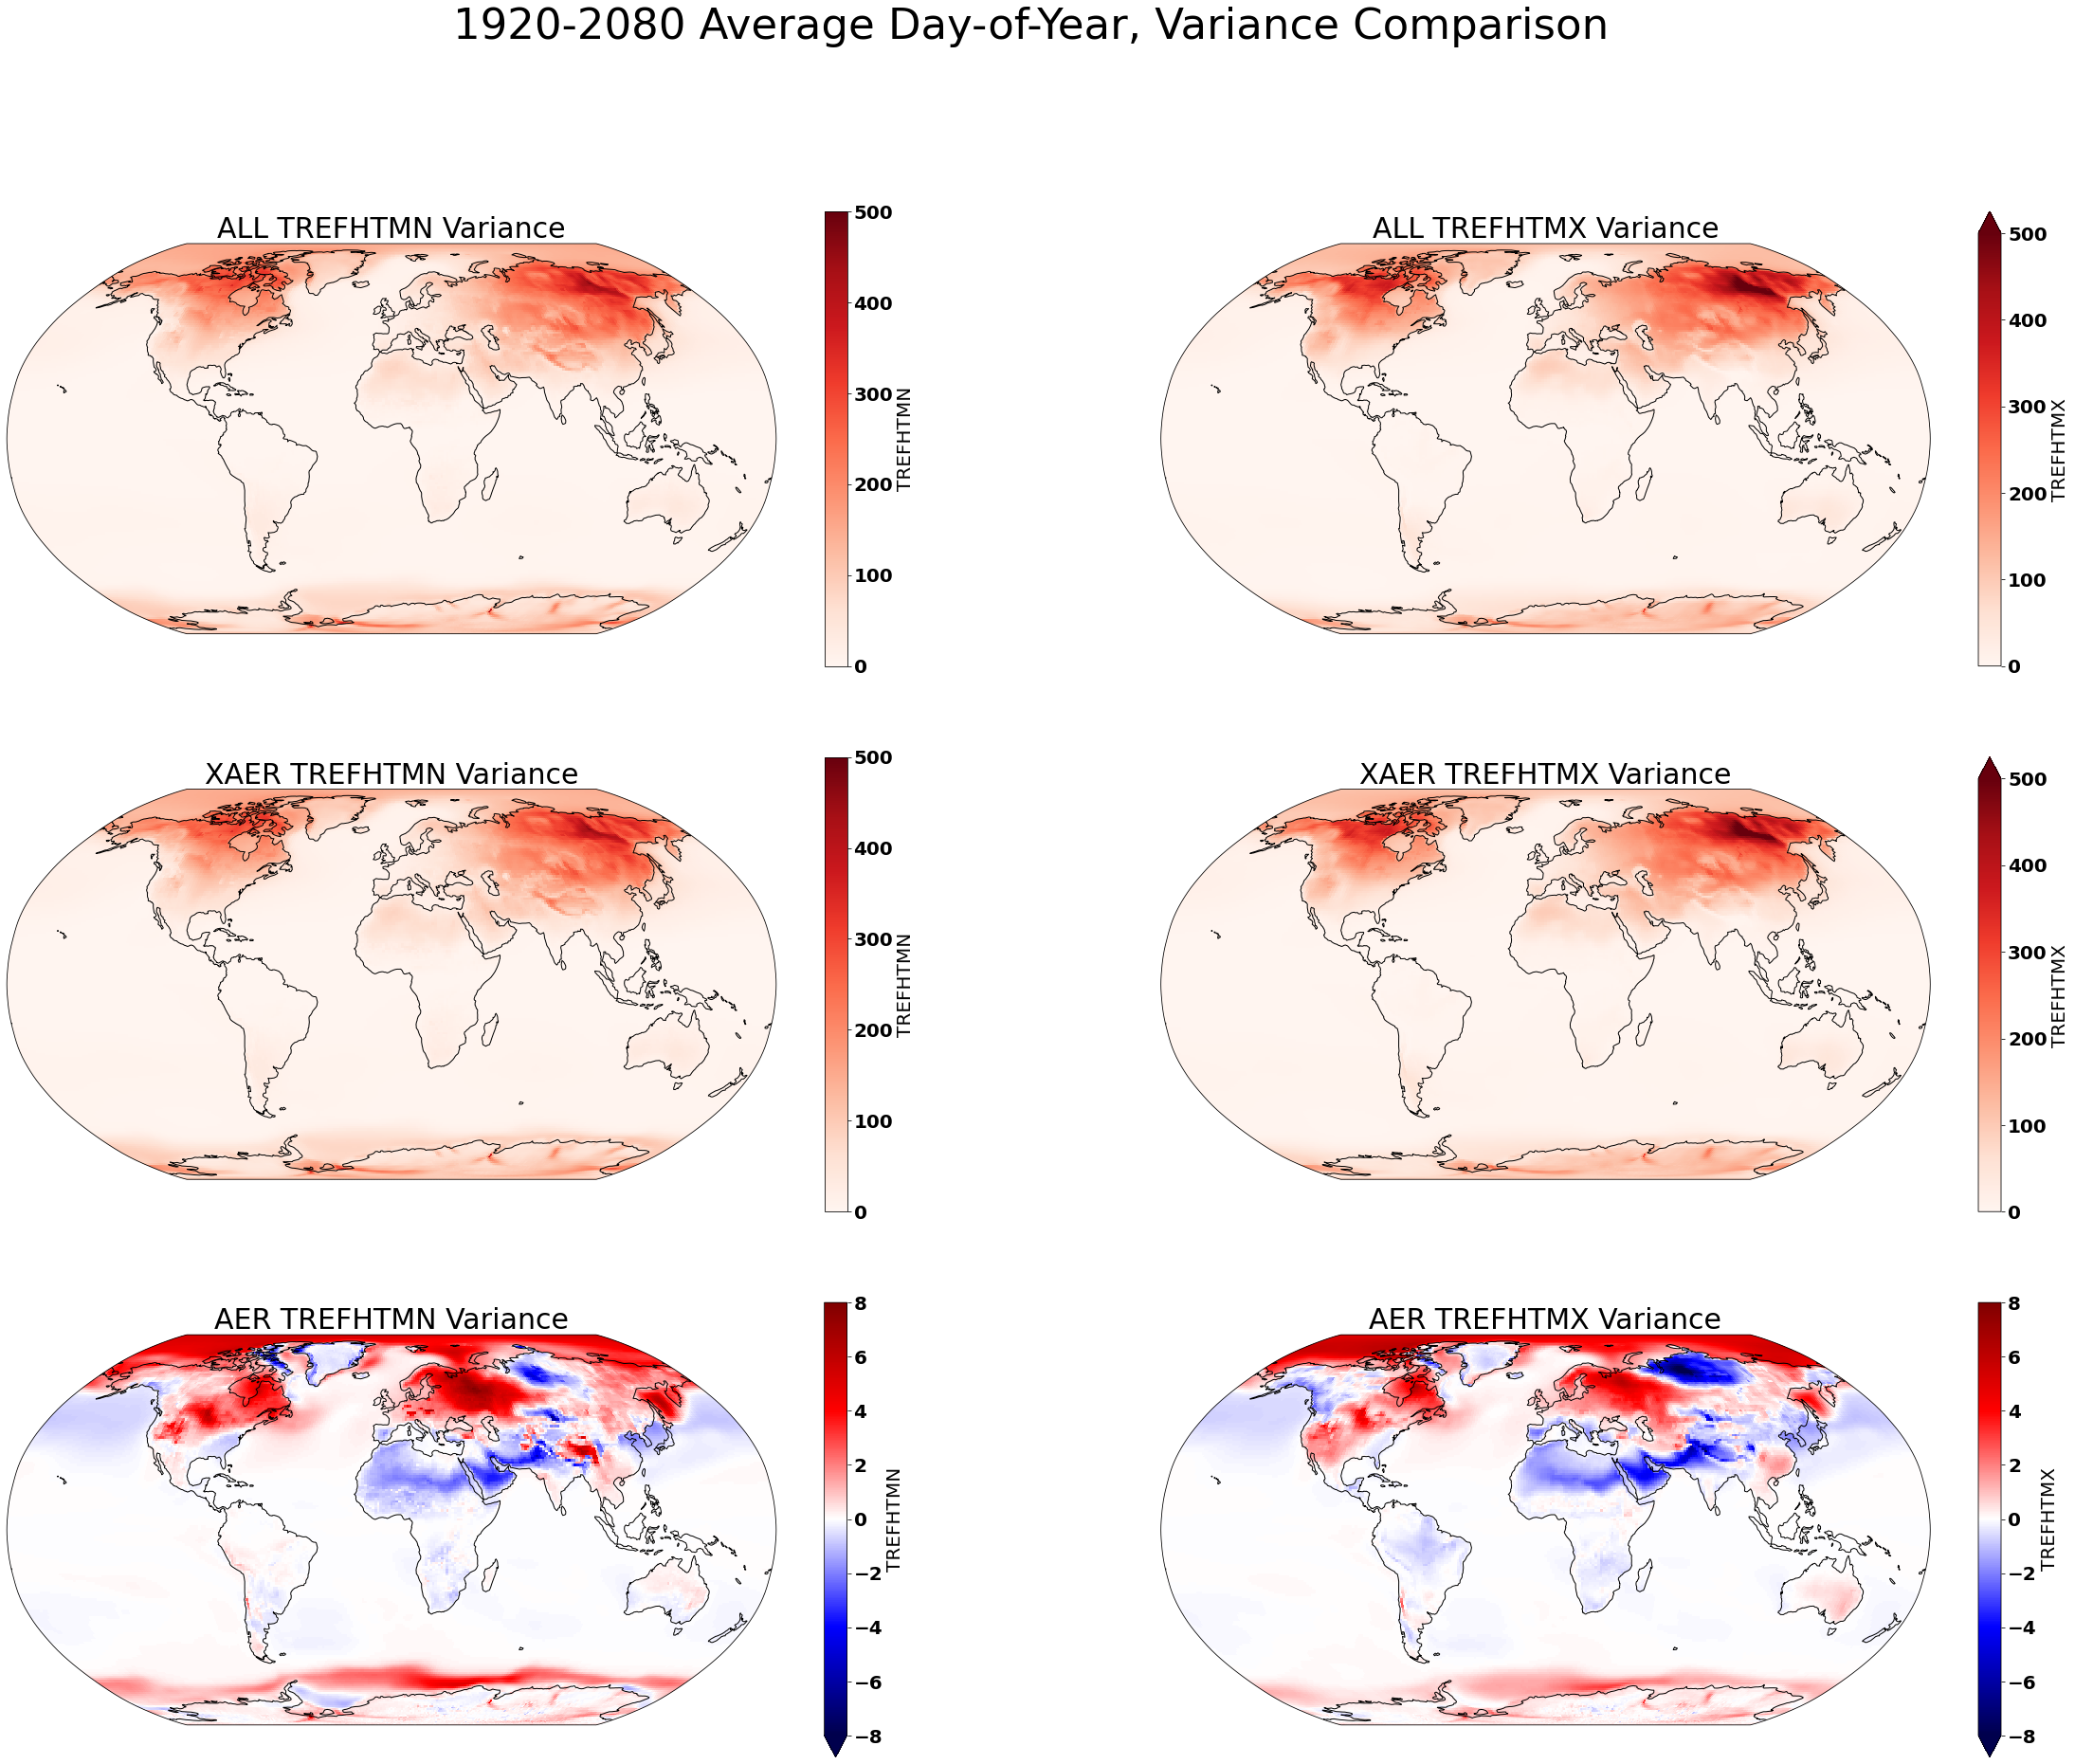

In [28]:
import matplotlib.pyplot as plt
from matplotlib import colors, rc
import cartopy.crs as ccrs

# Example:
# ds["TREFHTMN"].mean(dim="member").groupby("time.dayofyear").mean().var(dim="dayofyear")

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(40, 30), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
rc('font', **{'weight': 'bold', 'size': 20})
f.suptitle("1920-2080 Average Day-of-Year, Variance Comparison", fontsize=45)

cmap = "Reds"
vmax = 500
vmin = 0
all_mn_variance.plot(ax=ax1, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
all_mx_variance.plot(ax=ax2, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
xaer_mn_variance.plot(ax=ax3, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
xaer_mx_variance.plot(ax=ax4, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())

(all_mn_variance - xaer_mn_variance).plot(ax=ax5, vmax=8, vmin=-8, cmap="seismic", transform=ccrs.PlateCarree())
(all_mx_variance - xaer_mx_variance).plot(ax=ax6, vmax=8, vmin=-8, cmap="seismic", transform=ccrs.PlateCarree())

title_size = 30
ax1.set_title("ALL TREFHTMN Variance", fontsize=title_size)
ax2.set_title("ALL TREFHTMX Variance", fontsize=title_size)
ax3.set_title("XAER TREFHTMN Variance", fontsize=title_size)
ax4.set_title("XAER TREFHTMX Variance", fontsize=title_size)
ax5.set_title("AER TREFHTMN Variance", fontsize=title_size)
ax6.set_title("AER TREFHTMX Variance", fontsize=title_size)


ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()
ax5.coastlines()
ax6.coastlines()

In [2]:
from paths import merra2_download
from analysis import bilinear_interpolation as bi_interp
import xarray

land_mask = xarray.open_dataset("/projects/dgs/persad_research/heat_research/data/land_mask.nc")["__xarray_dataarray_variable__"]

merra2_max = xarray.open_dataset(merra2_download())["T2MMAX"].groupby("time.dayofyear").mean().var(dim="dayofyear")
merra2_min = xarray.open_dataset(merra2_download())["T2MMIN"].groupby("time.dayofyear").mean().var(dim="dayofyear")
merra2_max_intp = bi_interp(merra2_max, all_mx_variance)
merra2_min_intp = bi_interp(merra2_min, all_mx_variance)
merra2_min_intp = merra2_min_intp.assign_coords(lon=(((merra2_min_intp.lon + 180) % 360) - 180)).sortby('lon')
merra2_max_intp = merra2_max_intp.assign_coords(lon=(((merra2_max_intp.lon + 180) % 360) - 180)).sortby('lon')
merra2_min_intp = merra2_min_intp.where(land_mask.values)
merra2_max_intp = merra2_max_intp.where(land_mask.values)

NameError: name 'all_mx_variance' is not defined

In [6]:
all_mn_variance = all_mn_variance.assign_coords(lon=(((all_mn_variance.lon + 180) % 360) - 180)).sortby('lon')
all_mx_variance = all_mx_variance.assign_coords(lon=(((all_mx_variance.lon + 180) % 360) - 180)).sortby('lon')
xaer_mn_variance = xaer_mn_variance.assign_coords(lon=(((xaer_mn_variance.lon + 180) % 360) - 180)).sortby('lon')
xaer_mx_variance = xaer_mx_variance.assign_coords(lon=(((xaer_mx_variance.lon + 180) % 360) - 180)).sortby('lon')

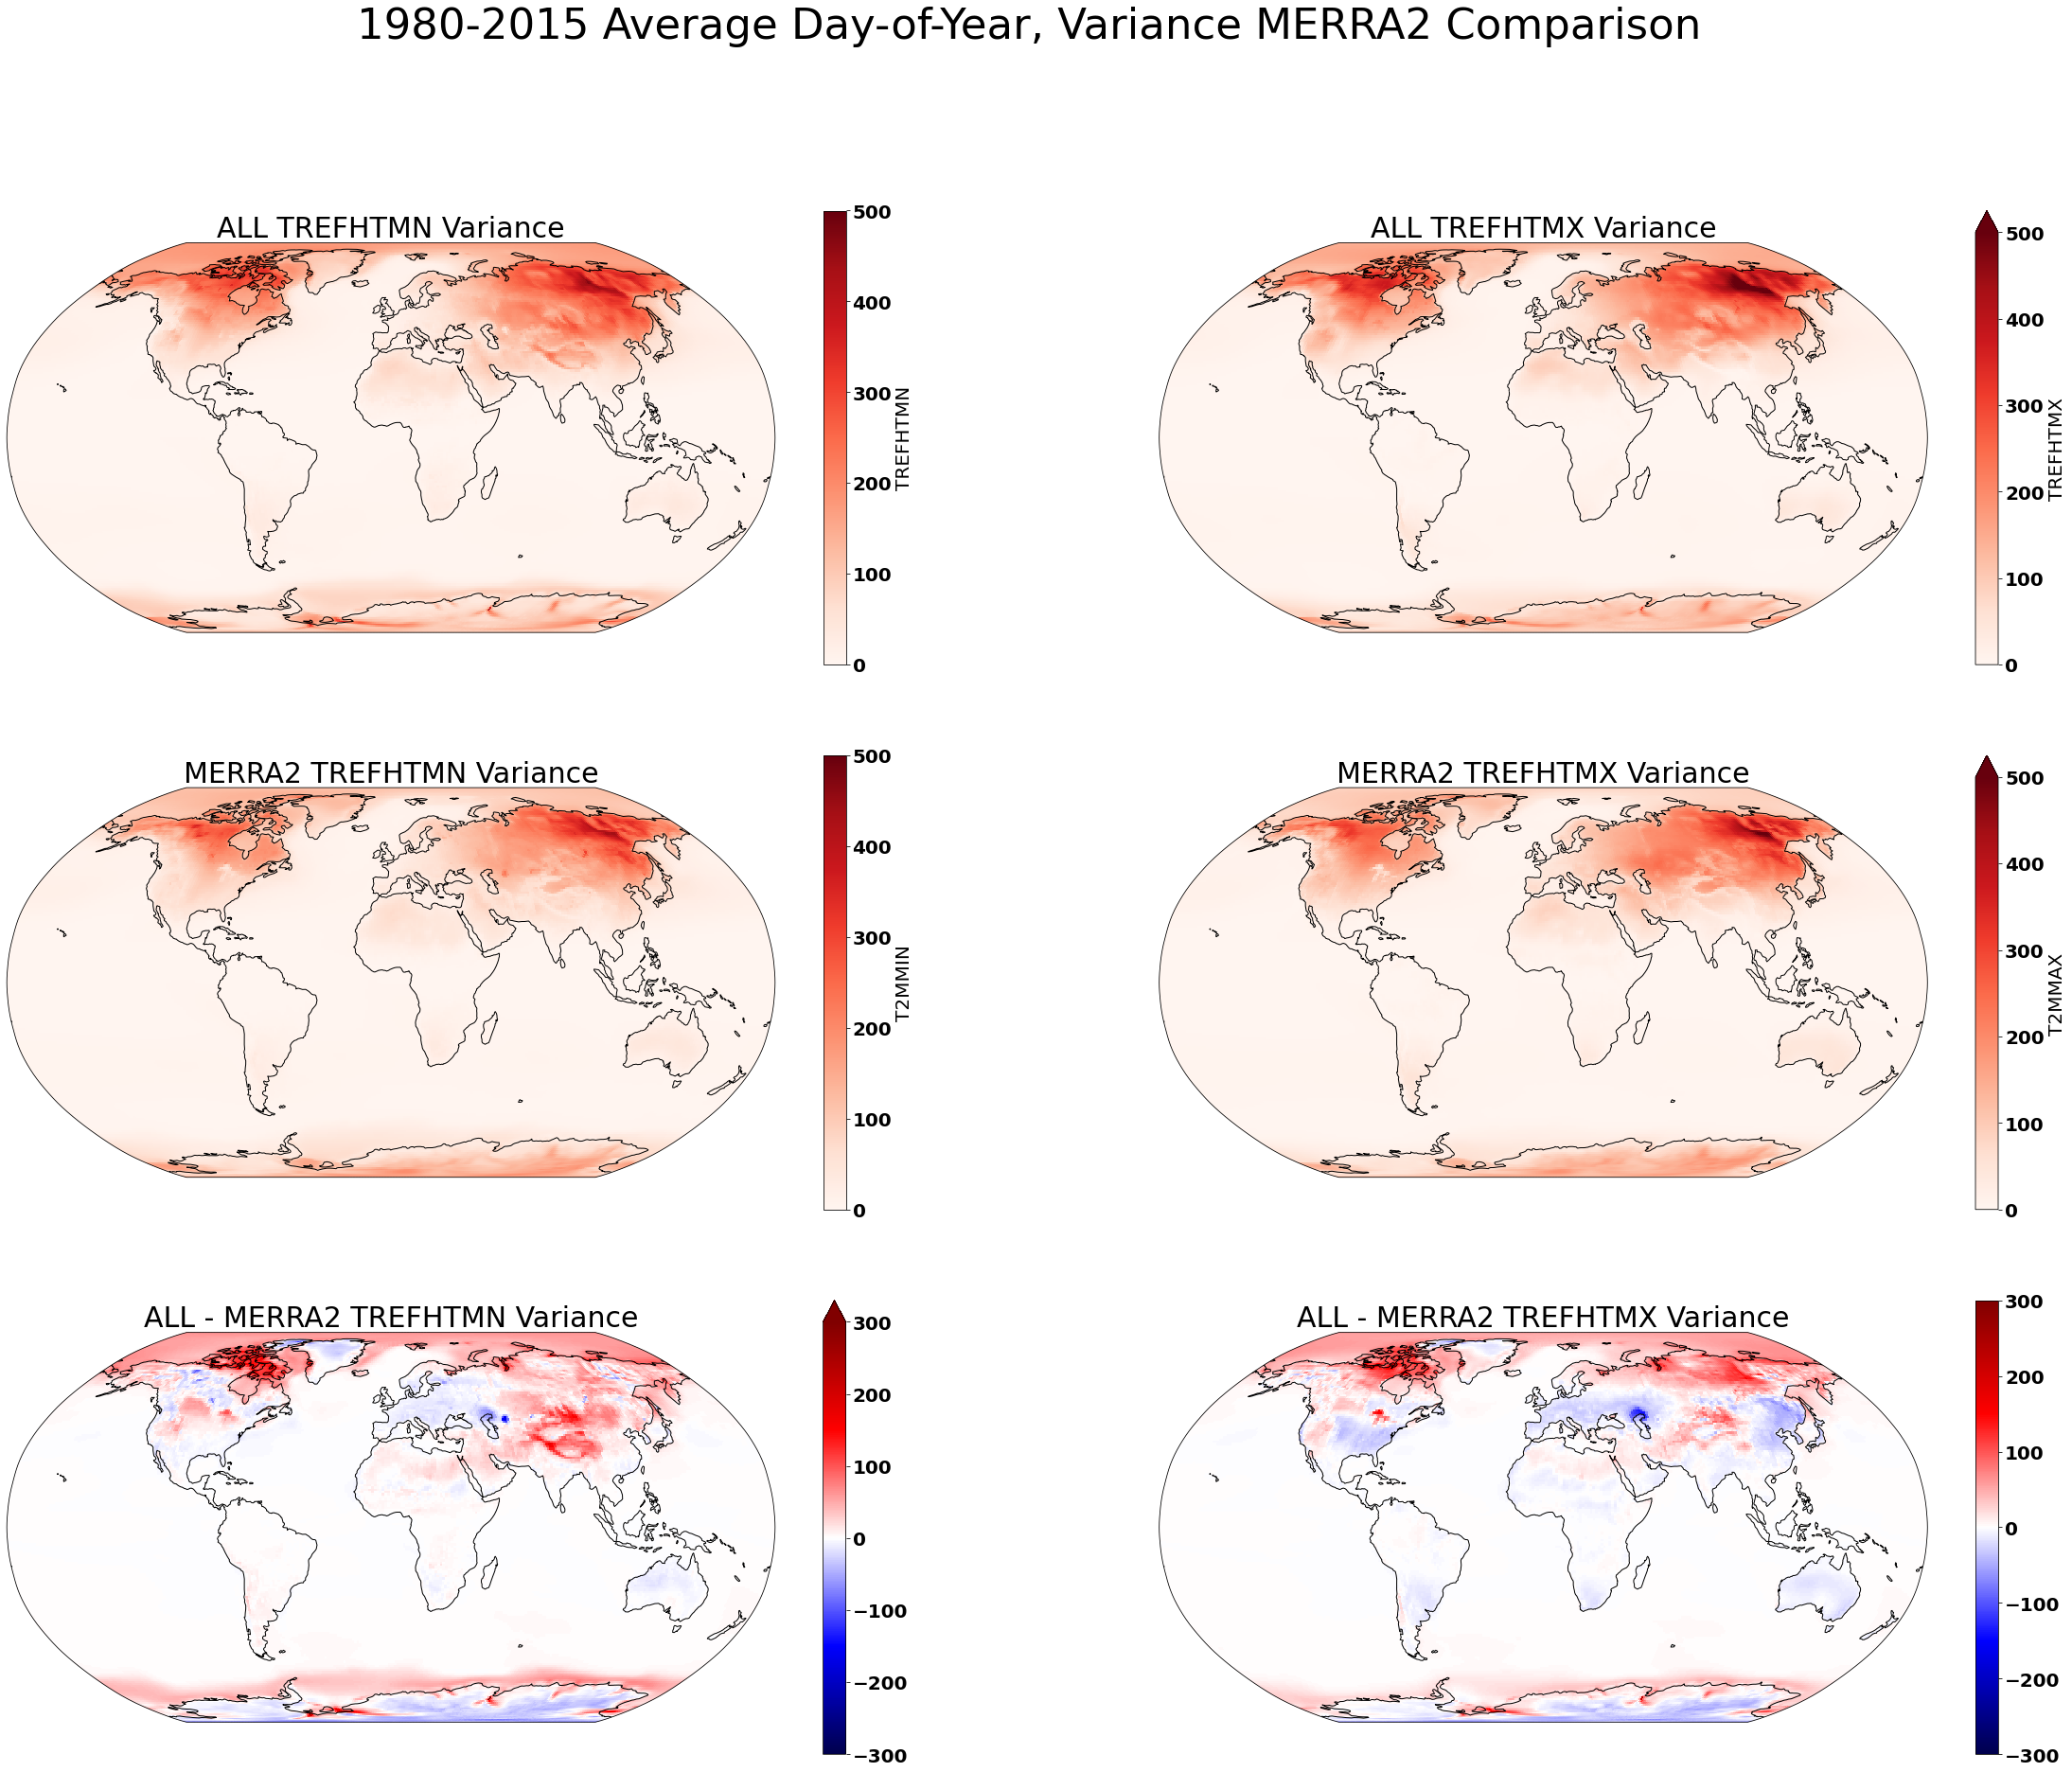

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors, rc
import cartopy.crs as ccrs

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(40, 30), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
rc('font', **{'weight': 'bold', 'size': 20})
f.suptitle("1980-2015 Average Day-of-Year, Variance MERRA2 Comparison", fontsize=45)

cmap = "Reds"
vmax = 500
vmin = 0
all_mn_variance.plot(ax=ax1, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
all_mx_variance.plot(ax=ax2, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())

merra2_min_intp.plot(ax=ax3, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
merra2_max_intp.plot(ax=ax4, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())

(all_mn_variance - merra2_min_intp).plot(ax=ax5, vmin=-300, vmax=300, cmap="seismic", transform=ccrs.PlateCarree())
(all_mx_variance - merra2_max_intp).plot(ax=ax6, vmin=-300, vmax=300, cmap="seismic", transform=ccrs.PlateCarree())

title_size = 30
ax1.set_title("ALL TREFHTMN Variance", fontsize=title_size)
ax2.set_title("ALL TREFHTMX Variance", fontsize=title_size)
ax3.set_title("MERRA2 TREFHTMN Variance", fontsize=title_size)
ax4.set_title("MERRA2 TREFHTMX Variance", fontsize=title_size)
ax5.set_title("ALL - MERRA2 TREFHTMN Variance", fontsize=title_size)
ax6.set_title("ALL - MERRA2 TREFHTMX Variance", fontsize=title_size)

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()
ax5.coastlines()
ax6.coastlines()

In [3]:
from dask.distributed import Client, progress

client = Client(processes=True, threads_per_worker=2,
                n_workers=15, memory_limit="20GB")

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 15
Total threads: 30,Total memory: 279.40 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46021,Workers: 15
Dashboard: http://127.0.0.1:8787/status,Total threads: 30
Started: Just now,Total memory: 279.40 GiB
Comm: tcp://127.0.0.1:34516,Total threads: 2
Dashboard: http://127.0.0.1:44319/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:42470,


In [ ]:
from paths import trefhtmn_members, trefhtmx_members
import xarray
import cftime

chunk={"lat":48, "lon":48}
all_mn_ds = xarray.open_mfdataset([path for path in trefhtmn_members()[0] if ".nc" in path], parallel=True, concat_dim="member", combine="nested", chunks=chunk)["TREFHTMN"].sel(time=slice(cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True), cftime.DatetimeNoLeap(2015, 12, 30, 0, 0, 0, 0, has_year_zero=True))).mean(dim="member").groupby("time.dayofyear").mean().var(dim="dayofyear")
all_mx_ds = xarray.open_mfdataset([path for path in trefhtmx_members()[0] if ".nc" in path], parallel=True, concat_dim="member", combine="nested", chunks=chunk)["TREFHTMX"].sel(time=slice(cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True), cftime.DatetimeNoLeap(2015, 12, 30, 0, 0, 0, 0, has_year_zero=True))).mean(dim="member").groupby("time.dayofyear").mean().var(dim="dayofyear")

xaer_mn_ds = xarray.open_mfdataset([path for path in trefhtmn_members()[2] if ".nc" in path], parallel=True, concat_dim="member", combine="nested", chunks=chunk)["TREFHTMN"].sel(time=slice(cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True), cftime.DatetimeNoLeap(2015, 12, 30, 0, 0, 0, 0, has_year_zero=True))).mean(dim="member").groupby("time.dayofyear").mean().var(dim="dayofyear")
xaer_mx_ds = xarray.open_mfdataset([path for path in trefhtmx_members()[2] if ".nc" in path], parallel=True, concat_dim="member", combine="nested", chunks=chunk)["TREFHTMX"].sel(time=slice(cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True), cftime.DatetimeNoLeap(2015, 12, 30, 0, 0, 0, 0, has_year_zero=True))).mean(dim="member").groupby("time.dayofyear").mean().var(dim="dayofyear")

print("Computing ALL TREFHTMN Variance")
all_mn_variance = client.compute(all_mn_ds).result()
print("Computing ALL TREFHTMX Variance")
all_mx_variance = client.compute(all_mx_ds).result()
print("Computing XAER TREFHTMN Variance")
xaer_mn_variance = client.compute(xaer_mn_ds).result()
print("Computing XAER TREFHTMX Variance")
xaer_mx_variance = client.compute(xaer_mx_ds).result()